<a href="https://colab.research.google.com/github/Konstantin5054232/ausbildungsprojekte/blob/main/14_flugtickets_festivals/flugtickets_festivals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nachfrage nach Airline-Flügen

In dieser Aufgabe werden wir die Präferenzen der Benutzer verstehen, die Tickets zu verschiedenen Zielen kaufen, die Datenbank studieren und die Nachfrage der Passagiere nach Flügen in Städte analysieren, in denen die größten Kulturfestivals stattfinden.

Wir haben Dateien mit folgenden Daten:

query_1.csv - enthält Informationen:

* model — Flugzeugmodell;
* flight_amount — Anzahl der Flüge für jedes Flugzeugmodell (Modell) im September 2018.

query_3.csv - enthält Informationen:
* city - Stadt;
* average_flights ist die durchschnittliche Anzahl der Flüge, die im September 2018 pro Tag in einer Stadt ankommen.

Für diese beiden Datensätze benötigen Sie:
* Dateien importieren;
* Daten enthaltenen 
* Datentypen auf Korrektheit prüfen;
* 10 besten Städte nach Anzahl der Flüge auswählen;
* Grafiken erstellen: Flugzeugmodelle und Anzahl der Flüge, Städte und Anzahl der Flüge, Top-10-Städte und Anzahl der Flüge;
* Schlussfolgerungen für jede der Grafiken ziehen, das Ergebnis erklären.

In [1]:
# Wir importieren die notwendigen Bibliotheken.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
# Wir laden Tabellen mit Daten.
query_1 = pd.read_csv('/content/query_1.csv')
query_3 = pd.read_csv('/content/query_3.csv')

In [3]:
# Wir werden die erhaltenen Daten studieren.
display(query_1)
display(query_3)

display(query_1.info())
display(query_3.info())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

In [4]:
# Wir werden die durchschnittliche Anzahl ankommender Flüge pro Tag im September 2018 in verschiedenen Städten darstellen.

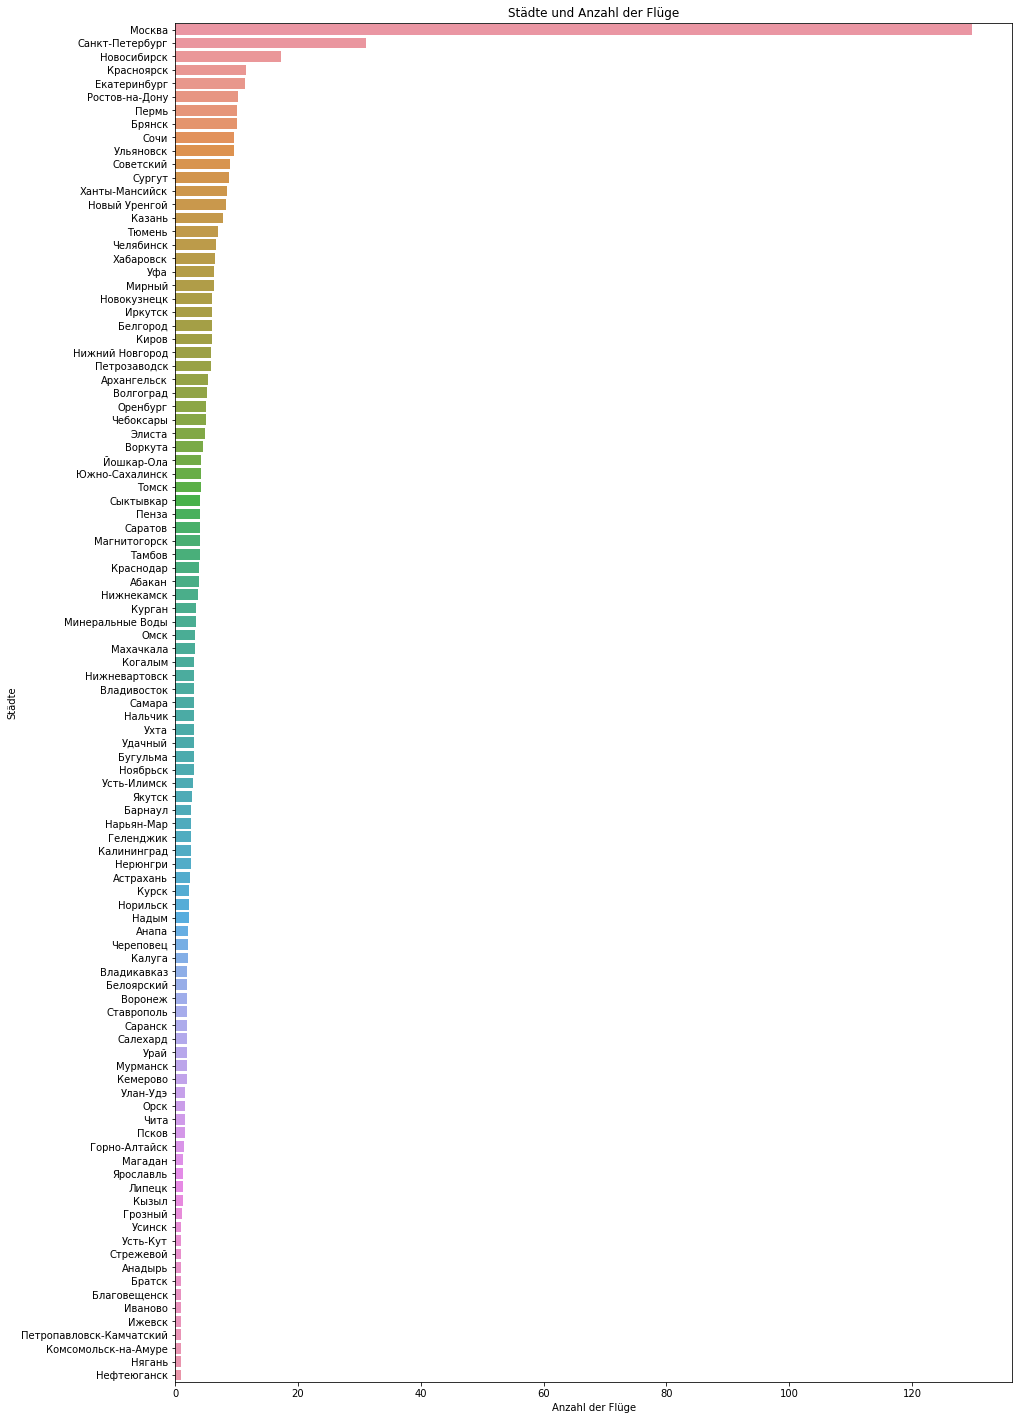

In [5]:
plt.figure(figsize=(15,25))
sns.barplot(x='average_flights', y='city',
            data=query_3.sort_values(by='average_flights', ascending=False))
plt.title('Städte und Anzahl der Flüge')
plt.xlabel('Anzahl der Flüge')
plt.ylabel('Städte');

**Schlussfolgerungen**

In Bezug auf die durchschnittliche Anzahl ankommender Flüge pro Tag im September 2018 führt Moskau mit großem Abstand, St. Petersburg liegt auf dem zweiten Platz und die Stadt Nowosibirsk schließt die ersten drei ab.

In [7]:
# Wir finden die Top-10-Städte nach durchschnittlichen Ankünften pro Tag im September 2018.
data=query_3.sort_values(by='average_flights', ascending=False).nlargest(columns=['average_flights'], n=10)
data

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Text(0, 0.5, 'Städte')

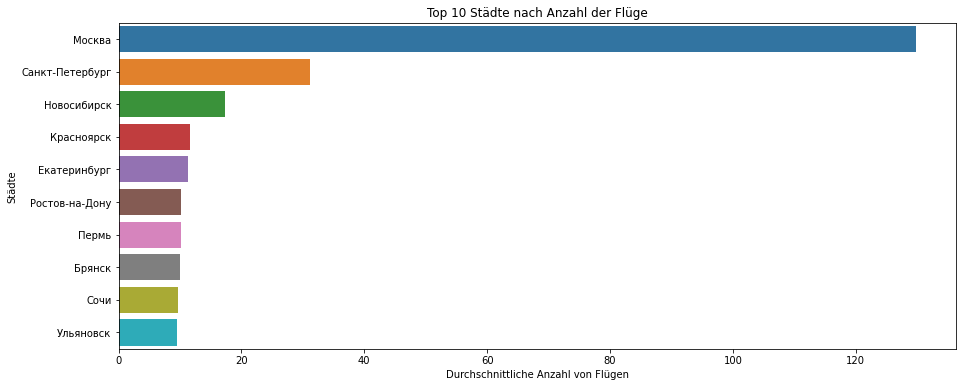

In [10]:
# Wir stellen die durchschnittliche Anzahl ankommender Flüge pro Tag im September 2018 in den Top-10-Städten dar.
plt.figure(figsize=(15,6))
sns.barplot(x='average_flights', y='city',
            data=query_3.sort_values(by='average_flights', ascending=False).nlargest(columns=['average_flights'], n=10))
plt.title('Top 10 Städte nach Anzahl der Flüge')
plt.xlabel('Durchschnittliche Anzahl von Flügen')
plt.ylabel('Städte')

**Schlussfolgerungen**

Durch die Auswahl nur der ersten 10 Städte lässt sich deutlich veranschaulichen, dass ohne die Top 3 die verbleibenden 7 Städte im September 2018 ungefähr die gleiche Anzahl von Flügen erhielten.

Text(0, 0.5, 'Flugzeugmodell')

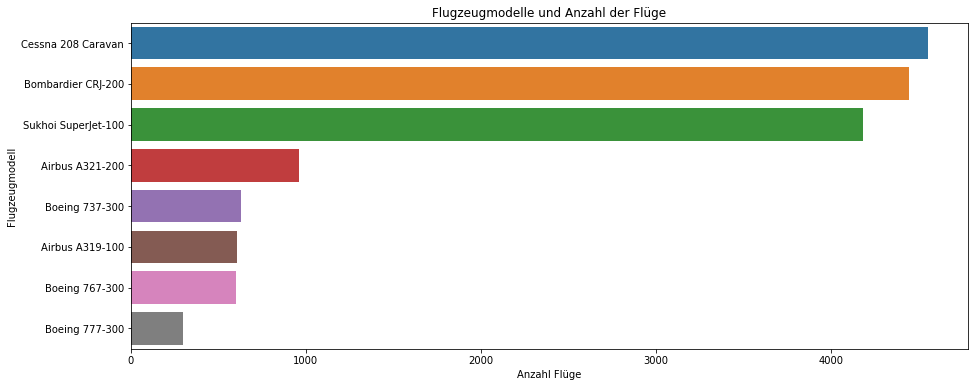

In [11]:
# Wir werden die Anzahl der Flüge mit verschiedenen Flugzeugtypen im September 2018 darstellen.
plt.figure(figsize=(15,6))
sns.barplot(x='flights_amount', y='model',
            data=query_1.sort_values(by='flights_amount', ascending=False))
plt.title('Flugzeugmodelle und Anzahl der Flüge')
plt.xlabel('Anzahl Flüge')
plt.ylabel('Flugzeugmodell')

**Schlussfolgerungen**

Wir sehen, dass die meisten Flüge im September 2018 von drei Arten von Kleinflugzeugen durchgeführt wurden. Geräumige Passagierflugzeuge führen zusammengenommen etwa so viele Flüge durch wie jeder dritte Kleinflugzeugtyp.

# Allgemeine Schlussfolgerung

Wir haben festgestellt, dass die meisten Flüge im September 2018 von drei Arten von Kleinflugzeugen durchgeführt wurden, während der absolute Spitzenreiter in Bezug auf die Anzahl der ankommenden Flüge pro Tag im September 2018 Moskau ist, das mehr Passagierflugzeuge mit großer Kapazität empfängt . Dieses Ergebnis ist höchstwahrscheinlich auf eine erhebliche Anzahl von Flügen auf Regionalflughäfen zurückzuführen, die von Kleinflugzeugen auf regionalen und überregionalen Strecken betrieben werden.